# Exploratory Data Analysis

Hurray!! Now that I am "done" with my second favourite part of the project, it is about time I get to my actual favourite part where I'll be listening to the data. Interesting, right?? Before we get ahead of ourselves, let's remember what we're looking for.

# Problem statement
**Between Liverpool FC and Arsenal, which team has had better match statistics between the 2007-2008 and 2016-2017 seasons of the Barclays Premier League?**<br>
Of course, I have changed my mind. Who wouldn't want to know how The Gunners compare with The Reds?<br>
Anyway, politics aside, by match statistics, I mean: **How the two teams compare when we look at winning rates, goals scored, shots fired and fouls committed.** And yes, I picked these variables because they are the only ones I had data for. If you have a problem with that, then go argue with your ancestors... We're busy here.

**NB:** The analyses in this project should guide me to an interesting question that I should explore further using more data. I want this project to be an on-going thing until I analyse fancy datasets like those collected by Opta.

## Solution scope
I am just going to look at their head-to-head encounters and supplement those results with each team's encounter with other teams during the league.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

# Set the style to 'ggplot'
plt.style.use('ggplot')

sys.path.append('../helper_funcs')
import helpers as hp
import general_stats_funcs as gsf

In [2]:
from importlib import reload

In [3]:
reload(hp)

<module 'helpers' from '../helper_funcs\\helpers.py'>

In [4]:
data = pd.read_csv('liverpool_arsenal.csv')

In [5]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,Final_HomeGoals,Final_AwayGoals,Final_Result,Half_HomeGoals,Half_AwayGoals,Half_Result,...,AwayShots_Target,Home_Fouls,Away_Fouls,Home_Corner,Away_Corner,Home_Yellows,Away_Yellows,Home_Reds,Away_Reds,Season
0,0,2007-11-08,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,...,7.0,18.0,11.0,4.0,2.0,4.0,2.0,0.0,0.0,0
1,7,2007-12-08,Arsenal,Fulham,2.0,1.0,H,0.0,1.0,A,...,9.0,6.0,19.0,14.0,4.0,1.0,5.0,0.0,0.0,0
2,24,2007-08-19,Blackburn,Arsenal,1.0,1.0,D,0.0,1.0,A,...,3.0,19.0,15.0,5.0,4.0,4.0,4.0,1.0,0.0,0
3,25,2007-08-19,Liverpool,Chelsea,1.0,1.0,D,1.0,0.0,H,...,2.0,11.0,16.0,5.0,2.0,4.0,5.0,0.0,0.0,0
4,27,2007-08-25,Arsenal,Man City,1.0,0.0,H,0.0,0.0,D,...,4.0,8.0,9.0,8.0,2.0,0.0,1.0,0.0,0.0,0


In [6]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [7]:
data.head()

,Date,HomeTeam,AwayTeam,Final_HomeGoals,Final_AwayGoals,Final_Result,Half_HomeGoals,Half_AwayGoals,Half_Result,Referee,...,AwayShots_Target,Home_Fouls,Away_Fouls,Home_Corner,Away_Corner,Home_Yellows,Away_Yellows,Home_Reds,Away_Reds,Season
0,2007-11-08,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,M Riley,...,7.0,18.0,11.0,4.0,2.0,4.0,2.0,0.0,0.0,0
1,2007-12-08,Arsenal,Fulham,2.0,1.0,H,0.0,1.0,A,P Dowd,...,9.0,6.0,19.0,14.0,4.0,1.0,5.0,0.0,0.0,0
2,2007-08-19,Blackburn,Arsenal,1.0,1.0,D,0.0,1.0,A,A Wiley,...,3.0,19.0,15.0,5.0,4.0,4.0,4.0,1.0,0.0,0
3,2007-08-19,Liverpool,Chelsea,1.0,1.0,D,1.0,0.0,H,R Styles,...,2.0,11.0,16.0,5.0,2.0,4.0,5.0,0.0,0.0,0
4,2007-08-25,Arsenal,Man City,1.0,0.0,H,0.0,0.0,D,C Foy,...,4.0,8.0,9.0,8.0,2.0,0.0,1.0,0.0,0.0,0


# Hypothesis generation

I think the first thing that somebody might want to know when comapring 2 teams in a game of football is their head-to-head statistics, so we're going to start with that. The following questions are going to aid our decision-making and conclusions on head-to-head interactions of these 2 teams. But as we are also aware, head-to-head statistics are not the whole story, so we are still going to use these questions for each team is at contests against other Premier League teams.


**Guiding questions**
1. For both teams, what are the winning/losing rates?
2. How many goals has each team scored over time?
3. What is the goal difference for each win/loss?
4. Who fires more shots? Total shots over time.
5. Who shoots more accurately and efficiently?
6. What is the ratio of goals to shots?
7. How is this ratio any different from that of goals to shots-on-target?
8. Who commits more fouls?
9. Is one team more aggressive(commits more fouls) when they are at home more than when they are away?
10. Do fouls affect the score?
11. Is venue a contributing factor to team's performance, either on goals, shots, fouls(including reds & yellows), or even shot accuracy and efficiency?

In [8]:
h2h = hp.head_to_head('Liverpool', 'Arsenal', data)
# h2h.head()

In [9]:
h2h.shape

(20, 23)

In [10]:
# Did I include all seasons?
set(h2h['Season']) # Yup!!

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### You're never done cleaning the data

So here's why I wrote the word 'done', in quotation marks at the beginning of this notebook: you're never done cleaning the data, until the project is been put to an end. Right now, I just realized that, visualizing head-to-head scores is going to be a nightmare with the dataset as it is, so I am going to have to "engineer" another feature in this data to make my work a little easier.

I am going to a Winners column in the original dataset(I will need in other analyses).

In [11]:
all_data = pd.read_csv('all_data.csv')

In [12]:
all_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [13]:
# all_data.info()

In [14]:
all_data['Winners'] = all_data.apply(hp.add_winners_col, axis=1)

In [15]:
all_data[['HomeTeam', 'AwayTeam', 'Final_Result', 'Winners']].head()

,HomeTeam,AwayTeam,Final_Result,Winners
0,Aston Villa,Liverpool,A,Liverpool
1,Bolton,Newcastle,A,Newcastle
2,Derby,Portsmouth,D,Draw
3,Everton,Wigan,H,Everton
4,Middlesbrough,Blackburn,A,Blackburn


In [16]:
all_data.to_csv('all_data.csv')

In [17]:
data = hp.subset_teams('Liverpool', 'Arsenal', all_data)

In [18]:
data.head()

,Date,HomeTeam,AwayTeam,Final_HomeGoals,Final_AwayGoals,Final_Result,Half_HomeGoals,Half_AwayGoals,Half_Result,Referee,...,Home_Fouls,Away_Fouls,Home_Corner,Away_Corner,Home_Yellows,Away_Yellows,Home_Reds,Away_Reds,Season,Winners
0,11/08/07,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,M Riley,...,18.0,11.0,4.0,2.0,4.0,2.0,0.0,0.0,0,Liverpool
7,12/08/07,Arsenal,Fulham,2.0,1.0,H,0.0,1.0,A,P Dowd,...,6.0,19.0,14.0,4.0,1.0,5.0,0.0,0.0,0,Arsenal
24,19/08/07,Blackburn,Arsenal,1.0,1.0,D,0.0,1.0,A,A Wiley,...,19.0,15.0,5.0,4.0,4.0,4.0,1.0,0.0,0,Draw
25,19/08/07,Liverpool,Chelsea,1.0,1.0,D,1.0,0.0,H,R Styles,...,11.0,16.0,5.0,2.0,4.0,5.0,0.0,0.0,0,Draw
27,25/08/07,Arsenal,Man City,1.0,0.0,H,0.0,0.0,D,C Foy,...,8.0,9.0,8.0,2.0,0.0,1.0,0.0,0.0,0,Arsenal


In [19]:
h2h = hp.head_to_head('Liverpool', 'Arsenal', data)
# h2h.head()

### Winning and goals

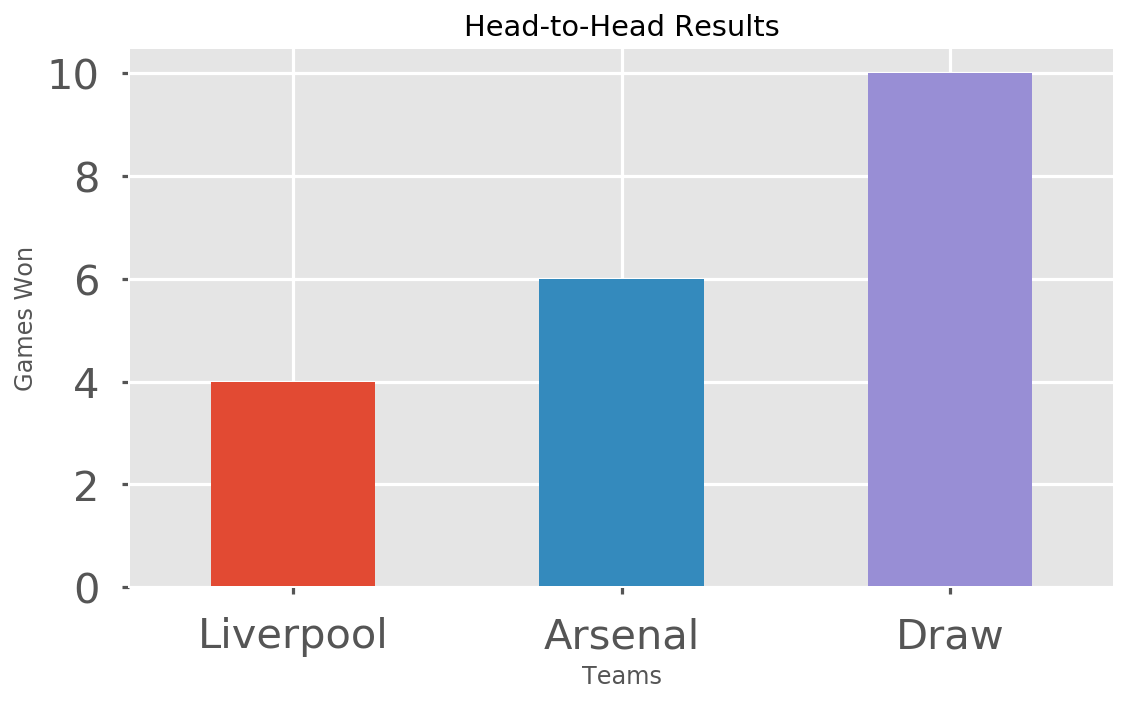

In [20]:
MIDSIZE = (8, 5)
fig, ax = plt.subplots(figsize=MIDSIZE)
h2h['Winners'].value_counts(ascending=True).plot(kind='bar', ax=ax, rot=0)
ax.set_ylabel("Games Won")
ax.set_xlabel("Teams")
ax.set_title('Head-to-Head Results')
plt.savefig('general_H2H.jpeg')
fig.tight_layout()

In [21]:
all_data['Goal_Diff'] = all_data.apply(hp.goal_diff, axis=1)

In [22]:
data = hp.subset_teams('Liverpool', 'Arsenal', all_data)
h2h = hp.head_to_head('Liverpool', 'Arsenal', data)

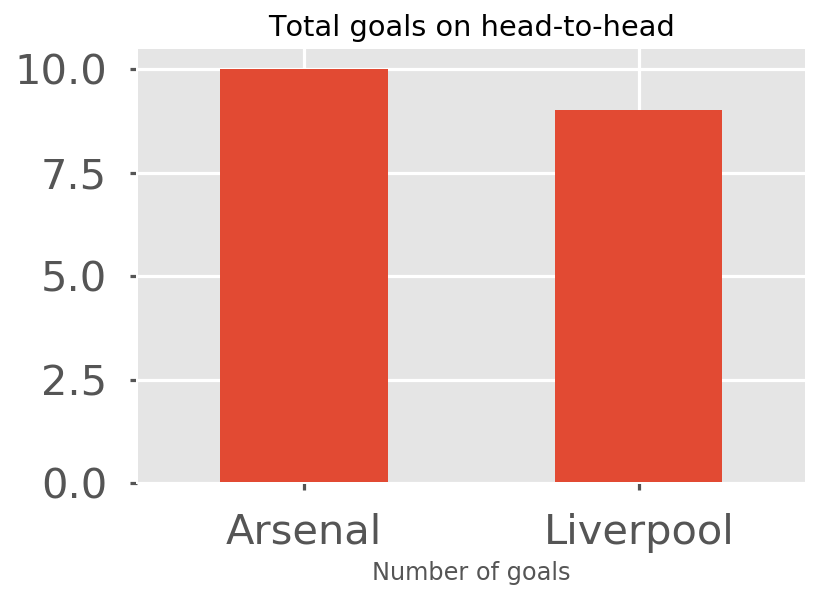

In [23]:
(h2h[h2h['Goal_Diff'] != 0][['Winners', 'Goal_Diff']]
     .groupby('Winners')
     .agg({'Goal_Diff': 'sum'})
     .plot(kind='bar', label='Goals', rot=0, legend=False))
plt.title('Total goals on head-to-head')
plt.xlabel('Number of goals')
plt.savefig('total_goals.jpeg')

So Arsenal has won more games, but we can also see that 50% of all of their interactions have resulted in ties. Additionally, Arsenal has won only 2 more matches out of 20.<br>
There is really even not much of a difference when we look at the goals they've scored against each other, even though Arsenal still has an upper-hand with a very small margin of 1 goal.<br>

**`These 2 teams have a balanced head-to-head in my opinion.`**

### Something is not right

I feel like there is something I am not doing right. How about if I can extract each team with its own data? I think this process will be much more bearable. Let me try it.

In [24]:
arsenal = hp.extract_team_data(h2h, 'Arsenal')
liverpool = hp.extract_team_data(h2h, 'Liverpool')

### A few more additions before going back to analysis
1. Wouldn't it be interesting if we know shots-on-target to shots ratio? I think Arsene Wenger - at some point in life - wanted to know how accurate his forces are, or if they just shoot for the sake of shooting.<br>
2. I also think of adding shots-on-target per goal: how efficient is a team when it comes to shooting?<br>

**Diclaimer:** Every time I use a function for the first time, I wrote and tested on the above cells, then moved it to my package file after it worked properly, so all there is in this notebook is the abstractions.

In [25]:
arsenal['target2shots'] = arsenal.apply(hp.get_ratio, var1='shots', var2='shots_target', axis=1)
arsenal['goals2target'] = arsenal.apply(hp.get_ratio, var1='shots_target', var2='ft_goals', axis=1)

liverpool['target2shots'] = liverpool.apply(hp.get_ratio, var1='shots', var2='shots_target', axis=1)
liverpool['goals2target'] = liverpool.apply(hp.get_ratio, var1='shots_target', var2='ft_goals', axis=1)

arsenal['foul2yellows'] = arsenal.apply(hp.get_ratio, var1='fouls', var2='yellows', axis=1)
liverpool['foul2yellows'] = liverpool.apply(hp.get_ratio, var1='fouls', var2='yellows', axis=1)

In [26]:
arsenal.head(3)

,rival,ft_result,ft_goals,ft_goal_diff,ht_result,ht_goals,ht_goal_diff,mr_ref,shots,shots_target,...,corners,yellows,reds,season,venue,shots_diff,shots_targ_diff,target2shots,goals2target,foul2yellows
0,Liverpool,Drew,1.0,0.0,Losing,0.0,-1.0,H Webb,11.0,4.0,...,1.0,3.0,0.0,0,Away,0.0,-4.0,2.750000,4.0,3.333333
1,Liverpool,Drew,1.0,0.0,Losing,0.0,-1.0,P Dowd,8.0,6.0,...,5.0,1.0,0.0,0,Home,-3.0,2.0,1.333333,6.0,10.000000
2,Liverpool,Drew,1.0,0.0,Draw,1.0,0.0,H Webb,6.0,3.0,...,2.0,3.0,1.0,1,Home,-4.0,-3.0,2.000000,3.0,4.666667


In [27]:
# Let's try some list comprehension to define the xticks
game_ticks = [x for x in range(0, len(arsenal.index), 4)]

In [28]:
def view_gameStats(team1, team2, team1_label, team2_label, ylabel, fig_name, title):
    
    fig_name = fig_name + '.jpeg'
    
    MIDSIZE = (10, 8)
    fig, ax = plt.subplots(figsize=MIDSIZE)

    plt.plot(team1, c='blue', label=team1_label)
    plt.plot(team2, c='red', label=team2_label)
    plt.xticks(game_ticks)
    plt.ylabel(ylabel)
    plt.xlabel('Games in succession')
    plt.title(team1_label + ' vs ' + team2_label + '\n' + title)
    plt.legend(loc='upper left', fontsize='medium')
    plt.savefig(fig_name)
    fig.tight_layout()

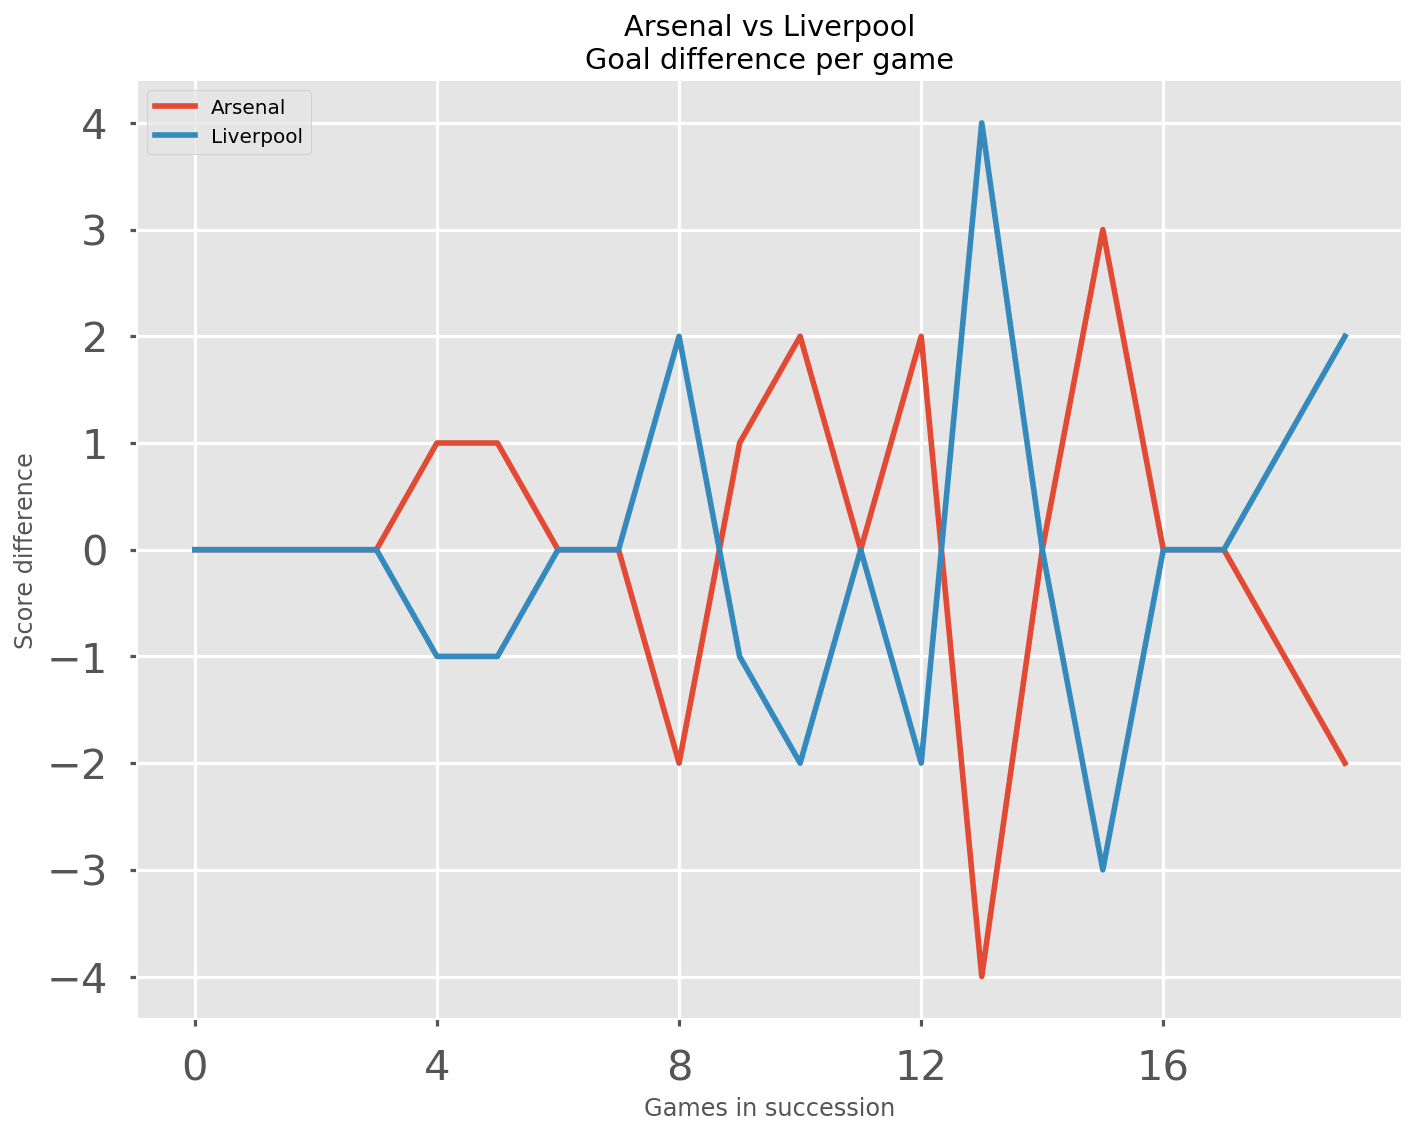

In [29]:
(hp.view_gameStats(arsenal['ft_goal_diff'],
                liverpool['ft_goal_diff'],
                'Arsenal', 'Liverpool', 
                'Score difference',
                'goal_diff',
                'Goal difference per game'))

### So who scores better than the other?

Hmmm...<br>
I can see a back-and-forth hitting, but let's pay closer attention. Between game 10 and 15(inclusive), Arsenal had an unbeaten run of 3 wins and 3 draws until Liverpool fired back with a 4 goal-difference victory, which Arsenal also responded with a 3 goal-difference victory.<br>

**`I therefore, think Arsenal has a better scoring history against Liverpool.`** I am saying this because Liverpool never had even 1 successive win against Arsenal, and yet, Arsenal had 2: games 4 and 5, and games 11 and 12. Every time Liverpool won against Arsenal, Arsenal always had a come-back victory before that story repeats itself.

### What do the shot analyses say?

First, look at the total shots, and shots-on-target then compare over time.
Looking at the shot efficiency, I have to pay close attention and a little more in-depth analysis because I am guessing Arsenal appears better simply because they have more goals. But then agian, that requires attention, right now I'm in a hurry.

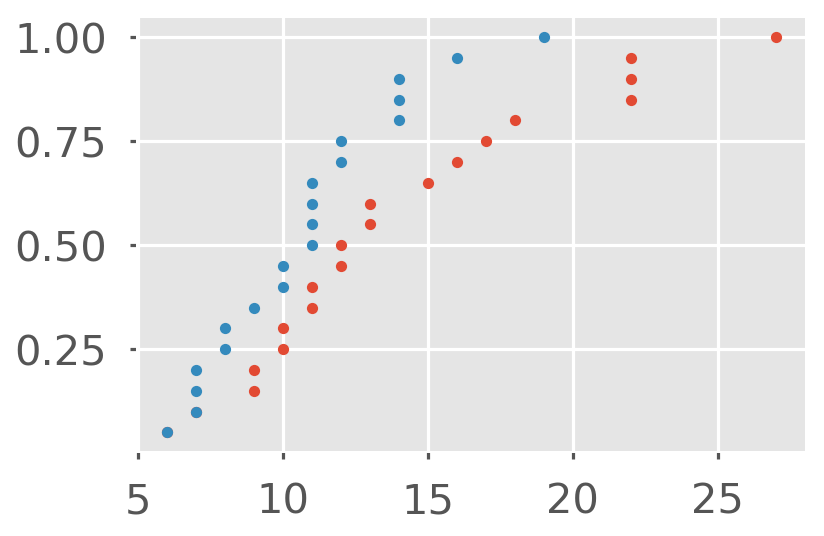

In [30]:
x_liv, y_livGoals = gsf.ecdf(liverpool['shots'])
x_ars, y_arsGoals = gsf.ecdf(arsenal['shots'])

_ = plt.plot(x_liv, y_livGoals, marker='.', linestyle='none')
_ = plt.plot(x_ars, y_arsGoals, marker='.', linestyle='none')

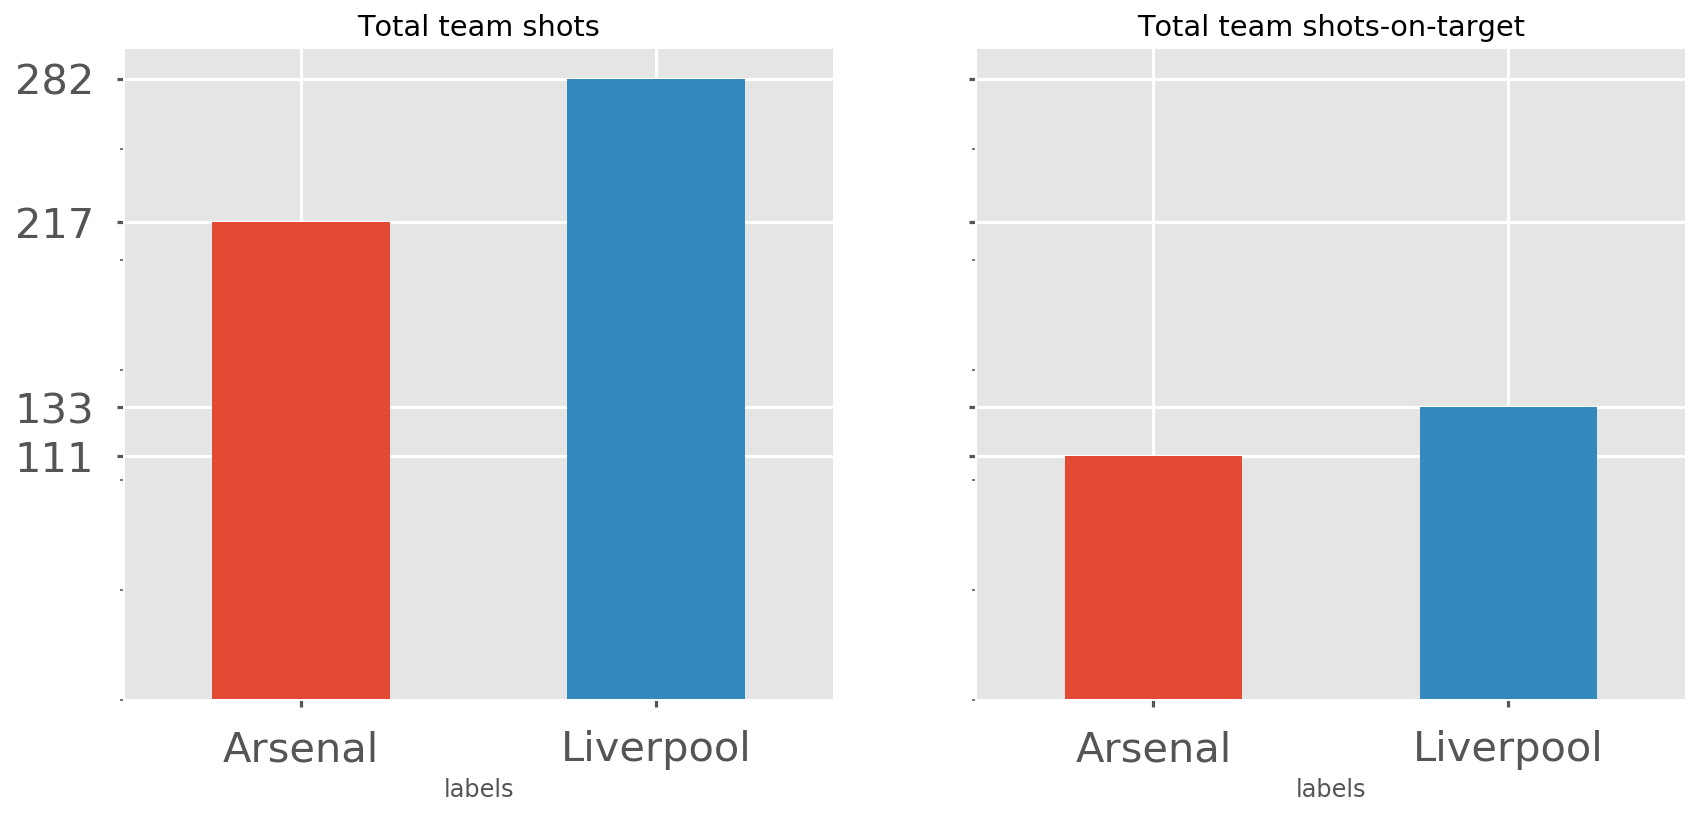

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sub_figSize = (14, 6)

# Shots in general
ars = sum(arsenal['shots'])
liv = sum(liverpool['shots'])

# Shots on target
ars_targ = sum(arsenal['shots_target'])
liv_targ = sum(liverpool['shots_target'])

shots_target = pd.DataFrame({'labels': ['Arsenal', 'Liverpool'],
                   'values': [ars, liv]})
_ = shots_target.plot.bar(x='labels', y='values', rot=0, legend=False, ax=ax1, figsize=sub_figSize)
_ = ax1.set_yticks([ars, liv, ars_targ, liv_targ]) # Only view the information I need on the y-axis labels
_ = ax1.set_title('Total team shots')

shots_target = pd.DataFrame({'labels': ['Arsenal', 'Liverpool'],
                   'values': [ars_targ, liv_targ]})
_ = shots_target.plot.bar(x='labels', y='values', rot=0, legend=False, ax=ax2, figsize=sub_figSize)
_ = ax2.set_title('Total team shots-on-target')

fig.savefig('total_shots.jpeg')

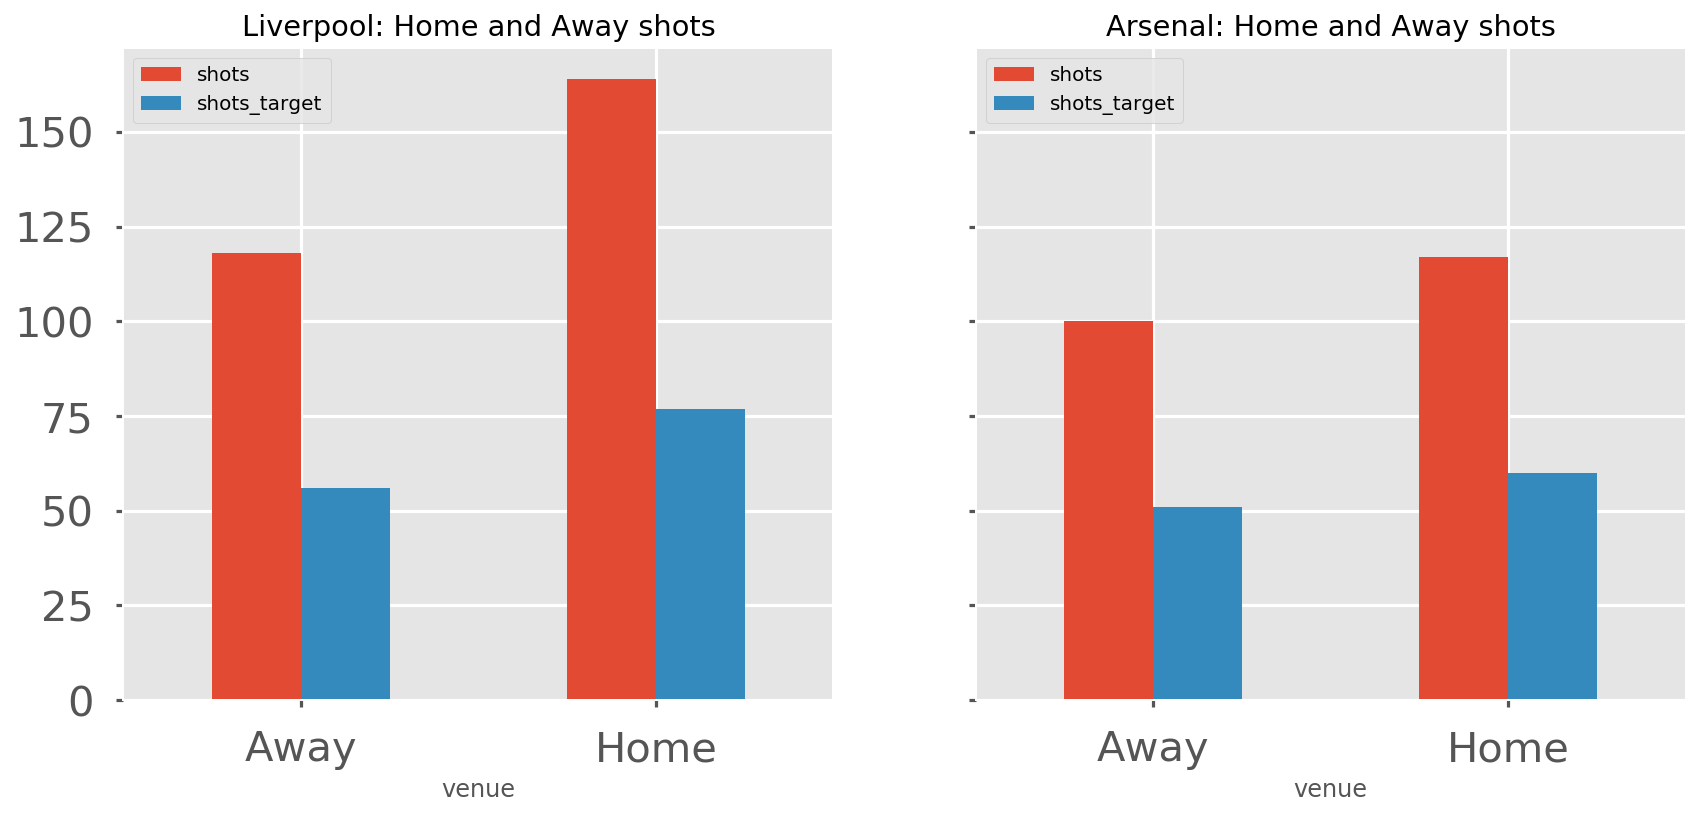

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sub_figSize = (14, 6)

liver_shots = (liverpool[['venue', 'shots', 'shots_target']]
         .groupby('venue')
         .agg({'shots': 'sum', 'shots_target': 'sum'}))

ars_shots = (arsenal[['venue', 'shots', 'shots_target']]
         .groupby('venue')
         .agg({'shots': 'sum', 'shots_target': 'sum'}))

_ = liver_shots[['shots', 'shots_target']].plot(kind='bar', ax=ax1, figsize=sub_figSize, rot=0)
_ = ars_shots[['shots', 'shots_target']].plot(kind='bar', ax=ax2, figsize=sub_figSize, rot=0)

_ = ax1.set_title('Liverpool: Home and Away shots')
_ = ax2.set_title('Arsenal: Home and Away shots')

_ = ax1.legend(loc='upper left', fontsize='medium')
_ = ax2.legend(loc='upper left', fontsize='medium')

#### Uhmm...

This looks a little hard to interprete, it's like you need a ruler or something. Can we make this better?<br>
I think it would be better if Away and Home statistics on separate tables. Let's do that.

* First we create an away_shots table for each team, then concatenate them to form a combined away tables
* Do the same for home_shots
* Visualize

In [33]:
def venue_shots(venue, team, df):
    venue_shots = (df[(df['venue'] == venue)][['shots', 'shots_target']])
    venue_shots['team'] = team
    venue_shots = venue_shots.groupby('team').agg({'shots': 'sum', 'shots_target': 'sum'})
    return venue_shots

In [34]:
liv_homeShots = hp.venue_shots('Home', 'Liverpool', liverpool)

In [35]:
ars_homeShots = hp.venue_shots('Home', 'Arsenal', arsenal)

In [36]:
home_shots = pd.concat([ars_homeShots, liv_homeShots], axis=0)

In [37]:
liv_awayShots = hp.venue_shots('Away', 'Liverpool', liverpool)

In [38]:
ars_awayShots = hp.venue_shots('Away', 'Arsenal', arsenal)

In [39]:
away_shots = pd.concat([ars_awayShots, liv_awayShots], axis=0)
away_shots

,shots,shots_target
team,,
Arsenal,100.0,51.0
Liverpool,118.0,56.0


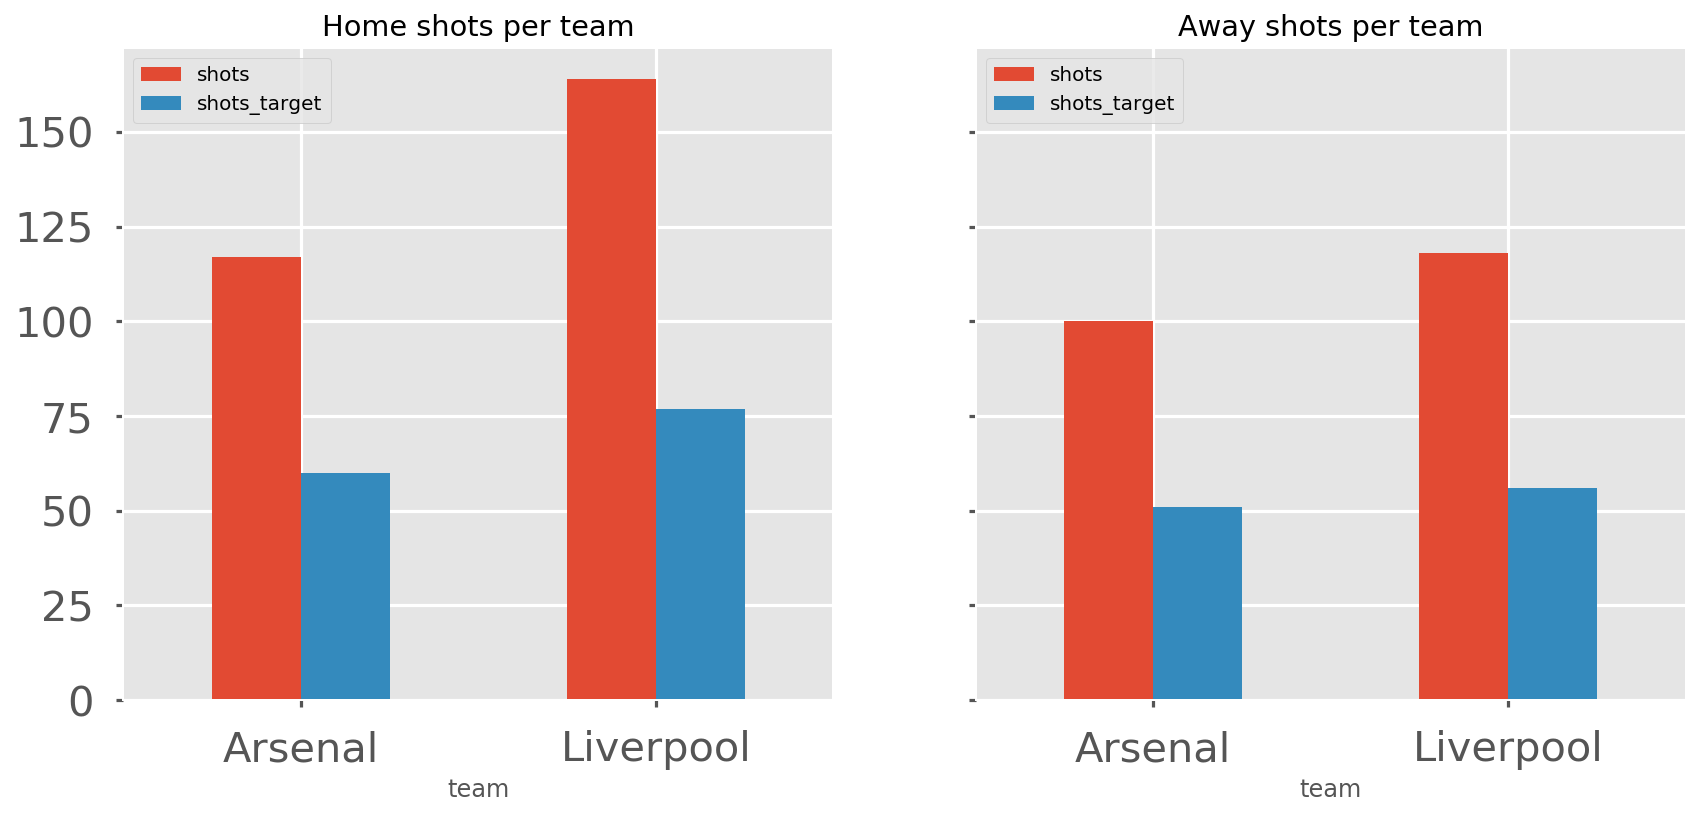

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sub_figSize = (14, 6)

_ = home_shots.plot(kind='bar', ax=ax1, figsize=sub_figSize, rot=0)
_ = away_shots.plot(kind='bar', ax=ax2, figsize=sub_figSize, rot=0)

_ = ax1.set_title('Home shots per team')
_ = ax2.set_title('Away shots per team')

_ = ax1.legend(loc='upper left', fontsize='medium')
_ = ax2.legend(loc='upper left', fontsize='medium')

_ = plt.savefig('shot_analysis.jpeg')

### How do these teams compare on home and away shot-statistics?

I am asking this question because it looks like Liverpool performs much better at Anfield than Arsenal than Arsenal at Emirates.<br>
This is what the plot is suggesting, but the `percentage difference` has the potential to disagree

**Answer:** The difference is insignificant, it does not even have to be part of the presentation.

In [ ]:
# Home Shots
liv_shots = home_shots[home_shots.index == 'Liverpool']['shots']
ars_shots = home_shots[home_shots.index == 'Arsenal']['shots']

liv_home_perc = ((liv_shots/sum(home_shots['shots'])) * 100)
ars_home_perc = ((ars_shots/sum(home_shots['shots'])) * 100)

# Home Shots-on-target
liv_H_target = home_shots[home_shots.index == 'Liverpool']['shots_target']
ars_H_target = home_shots[home_shots.index == 'Arsenal']['shots_target']

liv_home_perc_targ = ((liv_H_target/sum(home_shots['shots_target'])) * 100)
ars_home_perc_targ = ((ars_H_target/sum(home_shots['shots_target'])) * 100)

In [ ]:
# Away Shots
liv_shots = away_shots[away_shots.index == 'Liverpool']['shots']
ars_shots = away_shots[away_shots.index == 'Arsenal']['shots']

liv_away_perc = ((liv_shots/sum(away_shots['shots'])) * 100)
ars_away_perc = ((ars_shots/sum(away_shots['shots'])) * 100)

# Away Shots-on-target
liv_A_target = away_shots[away_shots.index == 'Liverpool']['shots_target']
ars_A_target = away_shots[away_shots.index == 'Arsenal']['shots_target']

liv_away_perc_targ = ((liv_A_target/sum(away_shots['shots_target'])) * 100)
ars_away_perc_targ = ((ars_A_target/sum(away_shots['shots_target'])) * 100)

In [ ]:
width = 0.35
graph1 = plt.bar([1], liv_home_perc_targ, width, color='red')
graph2 = (plt.bar([1], ars_home_perc_targ, width, color='blue', 
                  bottom=liv_home_perc_targ))
graph1 = plt.bar([2], liv_away_perc_targ, width, color='red')
graph2 = (plt.bar([2], ars_away_perc_targ, width, color='blue', 
                  bottom=liv_away_perc_targ))

# The percentage difference is really small, so really, never mind

The percentage difference with which each of these teams shoot on target is almost the same, the difference is sooo small it's negligible.

### Is Liverpool consistently shooting more?

It is natural in football that, when a team is losing - perhaps a goal or two, down - they tend to work harder to equalize, hence more shots, but during a tie, or when it's winning, you may find that it is not as aggressive. I therefore, would like to know if Liverpool's rate of winning is independent of their level of score(meaning it's consistent) or if there seems to be a reason for their increased number of shots.

In [ ]:
h2h.loc[:,'Referee': 'Away_Fouls'].head()

#### More cleaning
I want to add the shots and shots-on-target difference columns to measure the shooting consistency of each team.
This means I am going to change the extract_team_data() function to add these 2 columns.

In [ ]:
reload(hp)

In [ ]:
arsenal = hp.extract_team_data(h2h, 'Arsenal')
liverpool = hp.extract_team_data(h2h, 'Liverpool')

In [ ]:
arsenal['target2shots'] = arsenal.apply(hp.get_ratio, var1='shots', var2='shots_target', axis=1)
arsenal['goals2target'] = arsenal.apply(hp.get_ratio, var1='shots_target', var2='ft_goals', axis=1)

liverpool['target2shots'] = liverpool.apply(hp.get_ratio, var1='shots', var2='shots_target', axis=1)
liverpool['goals2target'] = liverpool.apply(hp.get_ratio, var1='shots_target', var2='ft_goals', axis=1)

arsenal['foul2yellows'] = arsenal.apply(hp.get_ratio, var1='fouls', var2='yellows', axis=1)
liverpool['foul2yellows'] = liverpool.apply(hp.get_ratio, var1='fouls', var2='yellows', axis=1)

In [ ]:
_ = sns.regplot(data=liverpool, x='shots_diff', y='ft_goal_diff')

#### There is a little-bit of inconsistency
Out of the 6 games that they lost to Arsenal, Liverpool has only been ahead(on shots) twice. In all the 4 matches they won, Liverpool has been shotting more than Arsenal. Out of 19 of their encounters, Arsenal has only been ahead 6 times, levelled the numbers twice and left the rest(11) in favour of Liverpool.

Looking at the fact that there seems to be a positive correlation between goal-difference and shot-difference, I don't think Liverpool is **not** clearly consistent with being ahead; I think they shoot more as they win or draw, and less when they lose. This **`may`** suggest that in some games, Arsenal comes very strong - not only on the goals - but also on the defense.<br>

I am saying, "may" because we need more data to verify this; it is possible that Liverpool may come to some of these games just terrible itself, not that Arsenal has a stronger defense.

In [ ]:
(hp.view_gameStats(arsenal['shots'],
                liverpool['shots'],
                'Arsenal', 'Liverpool', 
                'Shots per game',
                'compare_shots',
                'Shots per head-to-head games'))

In [ ]:
(hp.view_gameStats(arsenal['goals2target'],
                liverpool['goals2target'],
                'Arsenal', 'Liverpool', 
                'Shot efficiency',
                'compare_shots',
                'Shots efficiency: Shots on target per goal'))

### This is misleading
The above graph that looks at shots-on-target per goal is not a good metric because sometimes a certain team leaves the game without scoring. Since the get_ratio() function used to calculate this, handles a ZeroDivisionError by returning a 0, this might falsly imply that a team did not shoot on target at all(like it did above), which is misleading. We are therefore going to look at the below graph, to rather compare the shots-on-target with shots in general, that should be how we determine shot_efficiency I guess. It would be great to calculate shot accuracy, I'm just not sure how.

In [ ]:
(hp.view_gameStats(arsenal['target2shots'],
                liverpool['target2shots'],
                'Arsenal', 'Liverpool', 
                'Shot accuracy rate',
                'shot_effiency',
                'Shots \"accuracy\": Shots per shot-on-target'))
fig.savefig('shot_accuracy.jpeg')

### A little counter-intuitive don't you think

I think the above graph can be easily understood by people used to analysing statistics, even in that case, I think I'd also have to do some explaining of what I meant by 'accuracy,' this is why I think I should build a more intuitive graph, where I calculate the percentage of shots-on-target out of all shots. I think that's a little easier to interprete for anyone who's been through high-school.

In [ ]:
arsenal['pct_onTarget'] = (arsenal['shots_target'] / arsenal['shots']) * 100
liverpool['pct_onTarget'] = (liverpool['shots_target'] / liverpool['shots']) * 100

In [ ]:
(hp.view_gameStats(arsenal['pct_onTarget'],
                liverpool['pct_onTarget'],
                'Arsenal', 'Liverpool', 
                'On-target percentage',
                'pct_ontarget',
                'Percentage of shots-on-target over all shots'))

### What was happening in game 15 though?

In [ ]:
(pd.concat([liverpool.loc[15:15,][['ft_result', 'ft_goals', 'shots', 'shots_target']], 
            arsenal.loc[15:15,][['ft_result', 'ft_goals', 'shots', 'shots_target']]], axis=0))

### So who keeps us at the edges of our seats?

We have seen that, on a head-to-head basis, Liverpool has been threatening the goalkeeper more than Arsenal. Like all football watchers can intuitively tell, both teams seem to  shoot less when they are away; however, Liverpool still fires more away shots than Arsenal. On the other hand, it should also be borne to mind that, Arsenal is not always lagging behind with troubling the goalie, most times when The Gunners have won against The Reds, they have indeed also fired more shots; Liverpool takes most of its more-shots advantage from drawn or won games, it is in only 2 instances when Liverpool had more shots but lost to Arsenal.

One more thing before we move on... Arsenal seems to generally outperform Liverpool - with a little margin though - when we look at the shots-on-target percentage per game. This observation probably explains why Liverpool has more shots, but less goals; it looks like it's their shot-accuracy.<br>`It is also an interesting observation that, both teams seem to have their shot-accuracy decrease with time.` Why? I can't tell yet.

**Conclusion**<br>
I'd say, looking at the head-to-head statistics, Arsenal is undoubtedly better than Liverpool; not only because they have won more games and scored more goals, but also because they are more "accurate" with their shooting opportunities that Liverpool.